In [ ]:
#Building a data pipleline
#Preprocessing for images for DL
#Creating a DNN classifier
#Evaluation model performance
#Saving the model for deployment


In [1]:

# Install dependencies and setup
!pip install keras
!pip install tensorflow
!pip install opencv-python matplotlib
!pip install nest-asyncio uvicorn
!pip install python-multipart
!pip install pyngrok
!pip install -U uvicorn
!pip install -U fastapi
!pip install colabcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=3ea9c00dc908b725510e3546f174d4f976b83656a559d4c430a52f7be4d5c783
  Stored in directory: /root/.cache/pip/wheels/9e/fc/1c/cf980e6413d3ee8e70cd8f39e2366b0f487e3e221aeb452eb0
Successfully built python-m

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr

%matplotlib inline               
import matplotlib.pyplot as plt
import numpy as np

**1.Load Data**


In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
from google.colab import drive
drive.mount('/content/drive')
!unzip drive/MyDrive/Dataset.zip > /dev/null

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(3000, 3000, 3)

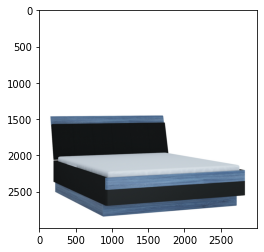

In [ ]:
data_dir = 'Data for test' 
image_exts = ['Bed','Chair','Sofa']
img = cv2.imread(os.path.join('Data for test', 'Bed', '160 cm kingsize bed.jpg'))
plt.imshow(img)
img.shape


In [5]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your data directory
data_dir = 'Data for test/'

# Define the parameters for image preprocessing and augmentation
img_size = (256,256)
batch_size = 32

# Define the data generator with preprocessing and augmentation options
datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    validation_split=0.1
)


# Load the images from the directory and split them into training and validation sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


# Verify class indices
print(train_generator.image_shape)

Found 270 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
(256, 256, 3)


**2. Build model**


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

input_shape = ( 256,256, 3)
model = Sequential([    
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

**3.Train**


In [7]:
hist = model.fit(train_generator,
          epochs=3,
          validation_data=val_generator)

Epoch 1/3
9/9 [==============================] - 77s 7s/step - loss: 3.8347 - accuracy: 0.3667 - val_loss: 0.8963 - val_accuracy: 0.6667
Epoch 2/3
9/9 [==============================] - 84s 9s/step - loss: 0.5553 - accuracy: 0.8074 - val_loss: 0.5451 - val_accuracy: 0.7667
Epoch 3/3
9/9 [==============================] - 68s 7s/step - loss: 0.4173 - accuracy: 0.8593 - val_loss: 0.4241 - val_accuracy: 0.8667


**4.Plot performance**


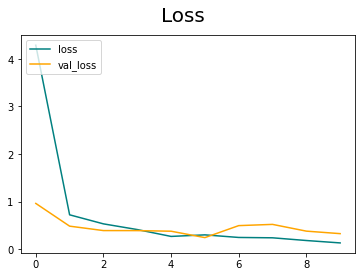

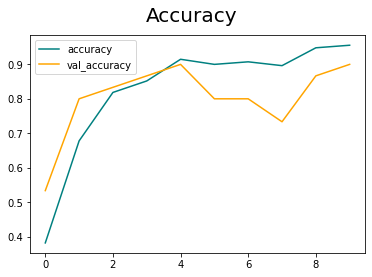

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**5. Evaluation**


In [ ]:
scores = model.evaluate_generator(val_generator, steps=len(val_generator))
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])


<ipython-input-16-b38227ace7b8>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(val_generator, steps=len(val_generator))


Test Loss: 0.43064311146736145
Test Accuracy: 0.8999999761581421


**6.Test**

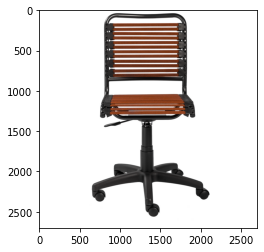

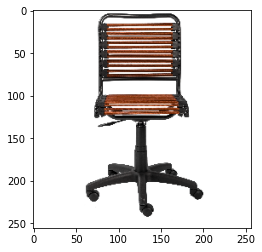

1/1 [==============================] - 0s 173ms/step
[[2.8236414e-14 1.0000000e+00 1.2461109e-16]] 1
Predicted class is Chair


In [ ]:
# import cv2
img = cv2.imread('Data for test/Chair/Allison Bungie Flat Low Back Office Chair.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

label = yhat[0].argmax()
print(yhat, label)

if label == 0: 
    print(f'Predicted class is Bed')
elif label==1:
    print(f'Predicted class is Chair')
else:
    print(f'Predicted class is Sofa')

**7. Save the model**

In [8]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','classifier.h5'))
new_model = load_model('models/classifier.h5')
# new_model.predict(np.expand_dims(resize/255, 0))

**8. FastAPI**


In [9]:
from pydantic import BaseModel
from colabcode import ColabCode

from fastapi import FastAPI , File, UploadFile
import uvicorn
import nest_asyncio
from pyngrok import ngrok
from uvicorn import Config, Server
from pydantic import BaseModel

MODEL = tf.keras.models.load_model('models/classifier.h5')


cc = ColabCode(port=8000, code=False)
app = FastAPI()


@app.get('/')
async def read_root():
    return{"Message": "This is {name}"}


@app.post("/api/predict")
async def predict(file: UploadFile = File(...)):
    img = await file.read()
    yhat = model.predict(np.expand_dims(img/255, 0))
    label = yhat[0].argmax()
    if label == 0:
        result ='Predicted class is Bed'
    elif label == 1:
        result = 'Predicted class is Chair'
    else:
        result = 'Predicted class is Sofa'
    print("Presiction=", result)
    return {"result": result}



In [ ]:
cc.run_app(app)

Public URL: NgrokTunnel: "https://462b-34-74-32-112.ngrok.io" -> "http://localhost:8000"


INFO:     Started server process [116]
INFO:uvicorn.error:Started server process [116]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


**Create a Docker image**

Install Docker in Google Colab.!curl -fsSL https://get.docker.com -o get-docker.sh && sh get-docker.sh

Build your Docker image. !touch Dockerfile

put dependencies in the Dockerfile.

*   FROM python:3.7
*   RUN pip install keras tensorflow opencv-python matplotlib nest-asyncio uvicorn python-multipart pyngrok uvicorn fastapi colabcode
*   COPY ./api /api/api
*   ENV PYTHONPATH=/api
*   WORKDIR /api
*   EXPOSE 8000
*   ENTRYPOINT ["uvicorn"]
*   CMD ["api.main:app", "--host", "0.0.0.0"]


Build the Docker image.

Verify that the image was created.

You can now use the Docker image you created to run your application:
!docker run -it --rm <image-name>

In [1]:
!curl -fsSL https://get.docker.com -o get-docker.sh && sh get-docker.sh
# RUN pip install keras tensorflow opencv-python matplotlib nest-asyncio uvicorn python-multipart pyngrok uvicorn fastapi colabcode

# Executing docker install script, commit: 66474034547a96caa0a25be56051ff8b726a1b28
+ sh -c apt-get update -qq >/dev/null
+ sh -c DEBIAN_FRONTEND=noninteractive apt-get install -y -qq apt-transport-https ca-certificates curl >/dev/null
+ sh -c mkdir -p /etc/apt/keyrings && chmod -R 0755 /etc/apt/keyrings
+ sh -c curl -fsSL "https://download.docker.com/linux/ubuntu/gpg" | gpg --dearmor --yes -o /etc/apt/keyrings/docker.gpg
+ sh -c chmod a+r /etc/apt/keyrings/docker.gpg
+ sh -c echo "deb [arch=amd64 signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu focal stable" > /etc/apt/sources.list.d/docker.list
+ sh -c apt-get update -qq >/dev/null
+ sh -c DEBIAN_FRONTEND=noninteractive apt-get install -y -qq docker-ce docker-ce-cli containerd.io docker-scan-plugin docker-compose-plugin docker-ce-rootless-extras docker-buildx-plugin >/dev/null


To run Docker as a non-privileged user, consider setting up the
Docker daemon in rootless mode for your user:

    dockerd-ro

In [ ]:
!touch Dockerfile
!nano Dockerfile


/bin/bash: nano: command not found


In [ ]:
!docker build -t <imagename> .


/bin/bash: imagename: No such file or directory
